Reaction Time Analysis

#### Description

We have conducted an experiment where participants have been asked to press one of two keys on the keyboard according to the shown stimulus. The stimuli where either pre-attentive (letter 'X' or letter 'I') or attentive (odd or even number). Each user had to fulfill two tasks with attentive and two tasks with pre-attentive stimuli which they one time had to perform with distraction in form of noise and one time without distraction, makining it four tasks in total of which each consisted of ten repeitions of the stimulus. For each participant participant ID, stimulus, complexity, distraction, the pressed key, if the correct key has been pressed, the reaction time in miliseconds and a timestamp have been logged in a csv file. Those four files have later been joined into one file called 'reaction_time_test_log.csv'.

#### Init

In [39]:
from pylab import *
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [40]:
%matplotlib inline

In [41]:
def shuffle_x(l, amount=0.5):
    from random import random
    shuffled = []
    for val in l:
        shuffled.append(val + amount * (random() - 0.5))
    return shuffled

#### Extract data from csv

In [42]:
data = genfromtxt("reaction_time_test_log.csv", dtype=None, delimiter=",", names=True)

In [43]:
data.dtype

dtype([('Participant_ID', '<i8'), ('Stimulus', 'S2'), ('Complexity', 'S12'), ('Distraction_enabled', '?'), ('Pressed_Key', 'S1'), ('correct_Key_Pressed', '?'), ('Reaction_Time_in_ms', '<i8'), ('Timestamp', 'S19')])

#### Reaction time for Condition A (Preattentive without distraction)

In [44]:
conditionA = []
for d in data:
    if(d['Complexity'] == b'preattentive' and not d['Distraction_enabled']):
        conditionA.append(d['Reaction_Time_in_ms'])

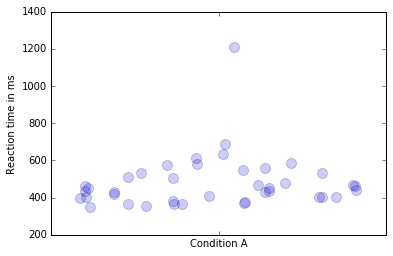

In [84]:
scatter(shuffle_x([10]*len(conditionA)), conditionA, s=100, alpha=0.2)
plt.ylabel('Reaction time in ms')
plt.xticks([10], ['Condition A'])
plt.show()

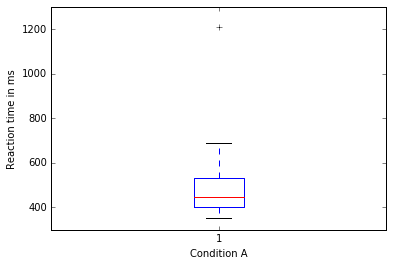

In [86]:
ignore_output = boxplot(conditionA)
plt.ylabel('Reaction time in ms')
plt.xlabel('Condition A')
plt.show()

#### Reaction time for Condition B (Preattentive with distraction)

In [9]:
conditionB = []
for d in data:
    if(d['Complexity'] == b'preattentive' and d['Distraction_enabled']):
        conditionB.append(d['Reaction_Time_in_ms'])

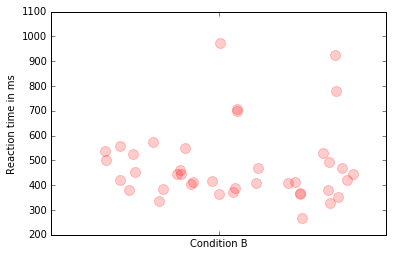

In [83]:
scatter(shuffle_x([10]*len(conditionB)), conditionB, s=100, alpha=0.2, color='red')
plt.ylabel('Reaction time in ms')
plt.xticks([10], ['Condition B'])
plt.show()

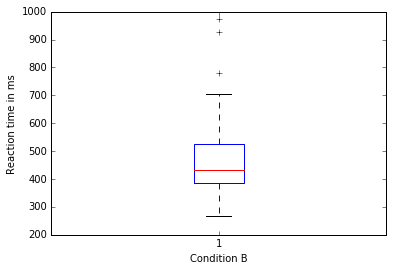

In [87]:
ignore_output = boxplot(conditionB)
plt.ylabel('Reaction time in ms')
plt.xlabel('Condition B')
plt.show()

#### Reaction time for Condition C (Attentive without distraction)

In [12]:
conditionC = []
for d in data:
    if(d['Complexity'] == b'attentive' and not d['Distraction_enabled']):
        conditionC.append(d['Reaction_Time_in_ms'])

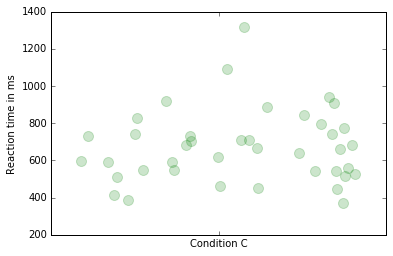

In [82]:
scatter(shuffle_x([10]*len(conditionC)), conditionC, s=100, alpha=0.2, color='green')
plt.ylabel('Reaction time in ms')
plt.xticks([10], ['Condition C'])
plt.show()

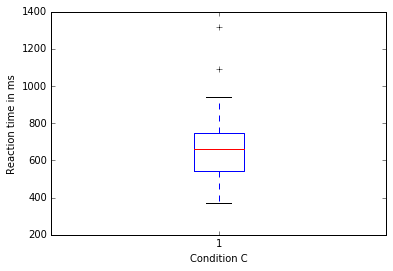

In [88]:
ignore_output = boxplot(conditionC)
plt.ylabel('Reaction time in ms')
plt.xlabel('Condition C')
plt.show()

#### Reaction time for Condition D (Attentive with distraction)

In [15]:
conditionD = []
for d in data:
    if(d['Complexity'] == b'attentive' and d['Distraction_enabled']):
        conditionD.append(d['Reaction_Time_in_ms'])

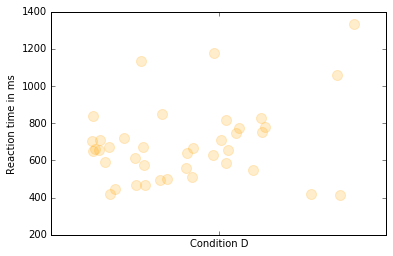

In [79]:
scatter(shuffle_x([10]*len(conditionD)), conditionD, s=100, alpha=0.2, color='orange')
plt.ylabel('Reaction time in ms')
plt.xticks([10], ['Condition D'])
plt.show()

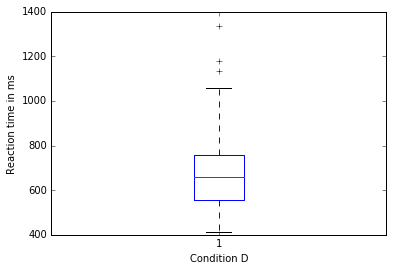

In [89]:
ignore_output = boxplot(conditionD)
plt.ylabel('Reaction time in ms')
plt.xlabel('Condition D')
plt.show()

#### Reaction time of all conditions combined

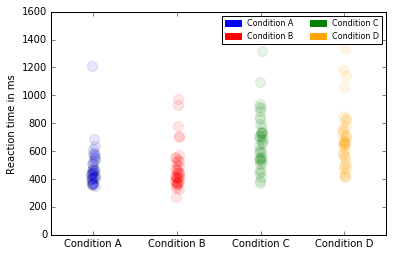

In [74]:
blue_patch = mpatches.Patch(color='blue', label='Condition A')
red_patch = mpatches.Patch(color='red', label='Condition B')
green_patch = mpatches.Patch(color='green', label='Condition C')
orange_patch = mpatches.Patch(color='orange', label='Condition D')

con_a = scatter(shuffle_x([10]*len(conditionA)), conditionA, s=100, alpha=0.1)
con_b = scatter(shuffle_x([20]*len(conditionB)), conditionB, s=100, alpha=0.1, color='red')
con_c = scatter(shuffle_x([30]*len(conditionC)), conditionC, s=100, alpha=0.1, color='green')
con_d = scatter(shuffle_x([40]*len(conditionD)), conditionD, s=100, alpha=0.1, color='orange')

plt.legend(handles=[blue_patch, red_patch, green_patch, orange_patch],
           scatterpoints=1,
           loc='best',
           ncol=2,
           fontsize=8)
plt.ylabel('Reaction time in ms')
plt.xticks([10, 20, 30, 40], ['Condition A', 'Condition B', 'Condition C', 'Condition D'])
plt.show()

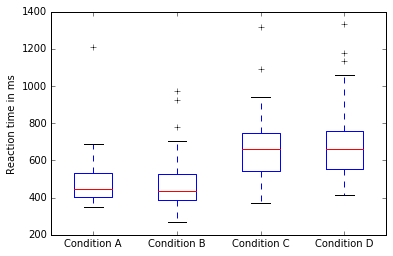

In [76]:
ignore_output = boxplot([conditionA, conditionB, conditionC, conditionD])
plt.ylabel('Reaction time in ms')
plt.xticks(range(1,5), ['Condition A', 'Condition B', 'Condition C', 'Condition D'])
plt.show()

#### T-test for Complexity

In [37]:
attentive = []
preattentive = []
for d in data:
    if d['Complexity'] == b'attentive':
        attentive.append(d['Reaction_Time_in_ms'])
    else:
        preattentive.append(d['Reaction_Time_in_ms'])

In [48]:
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
t_statistic, p_value = ttest_ind(attentive, preattentive)
# we need higher precision float to show the p-value
print("p-value: %.15f (%s)" % (p_value, "significant" if p_value < 0.05 else "not significant"))

p-value: 0.000000000023919 (significant)


#### T-test for Distraction

In [42]:
distracted = []
notDistracted = []
for d in data:
    if d['Distraction_enabled']:
        distracted.append(d['Reaction_Time_in_ms'])
    else:
        notDistracted.append(d['Reaction_Time_in_ms'])

In [43]:
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
t_statistic, p_value = ttest_ind(distracted, notDistracted)
print("p-value: %f (%s)" % (p_value, "significant" if p_value < 0.05 else "not significant"))

p-value: 0.877191 (not significant)


#### Discussion

The results of our evaluation show that there is no siginifacant difference for the reaction time whether the participants have been distracted by noise or not but also that complexity of tasks, i.e. whether the stimuli used were attentive or pre-attentive makes a siginificant difference which is suggested by a p-value < 0.05.
This could already be suspected by looking a the results of conditions A and B, using pre-attentive stimuli, which generally were better than those of conditions C and D, conditions including attentive stimuli.